1) Delivery_time -> Predict delivery time using sorting time

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore')

In [12]:
data = pd.read_csv('delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [13]:
data['Sorting Time'].mean()

6.190476190476191

## EDA and Data Visualization

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

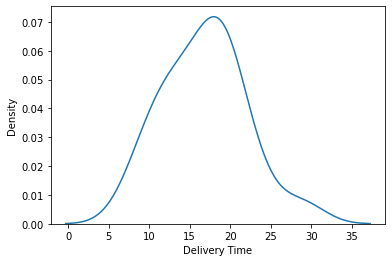

In [14]:
sns.distplot(a=data['Delivery Time'], hist=False)

In [15]:
data['Delivery Time'].skew()

0.3523900822831107

In [16]:
data['Delivery Time'].kurtosis()

0.31795982942685397

The delivery time is failed the normality test which is dependent variabe

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

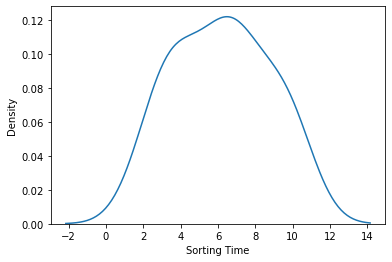

In [17]:
sns.distplot(a=data['Sorting Time'], hist=False)

In [18]:
data['Sorting Time'].skew()

0.047115474210530174

In [19]:
data['Sorting Time'].kurtosis()

-1.14845514534878

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [21]:
data = data.rename({'Delivery Time': 'delivery_time','Sorting Time': 'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


### correlation 

In [22]:
data.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

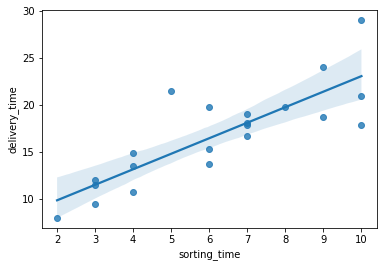

In [23]:
sns.regplot(x=data['sorting_time'],y=data['delivery_time'])

#  model building

In [24]:
model=smf.ols("delivery_time~ sorting_time",data=data).fit()

In [25]:
model

# model testing

In [26]:
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [27]:
model.tvalues

Intercept       3.823349
sorting_time    6.387447
dtype: float64

In [28]:
model.pvalues

Intercept       0.001147
sorting_time    0.000004
dtype: float64

In [29]:
model.rsquared, model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [30]:
delivery_time = (6.582734) + (1.649020)*(5) # manual y=mx+c  m=1.649020 , x= 5 , c= 6.58273
delivery_time  # manual prediction

14.827834

In [31]:
data_pred=pd.DataFrame(data ={'sorting_time':[6,5]})
data_pred

,sorting_time
0,6
1,5


In [32]:
model.predict(data_pred)  # machine prediction

0    16.476853
1    14.827833
dtype: float64

In [33]:
# here the data is predicted

## ========================================================================= 

2) Salary_hike -> Build a prediction model for Salary_hike

In [34]:
values = pd.read_csv('Salary_Data.csv')

In [35]:
values

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [36]:
values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


##  correlation

In [88]:
values.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [89]:
sns.regplot(x=values['year_exp'],y=values['salary'])

KeyError: 'year_exp'

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

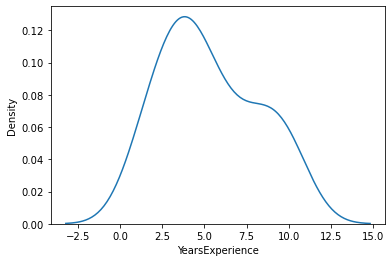

In [90]:
sns.distplot(a=values['YearsExperience'],hist=False)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

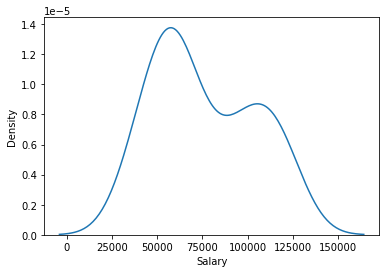

In [91]:
sns.distplot(a=values['Salary'],hist=False)

##  model building

In [92]:
values = values.rename({'YearsExperience': 'year_exp','Salary': 'salary'},axis=1)

In [93]:
values

,year_exp,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


## model testing

In [94]:
kod =smf.ols("salary~year_exp",data=values).fit()

In [95]:
kod

In [96]:
kod.params

Intercept    25792.200199
year_exp      9449.962321
dtype: float64

In [97]:
kod.tvalues

Intercept    11.346940
year_exp     24.950094
dtype: float64

In [98]:
kod.pvalues

Intercept    5.511950e-12
year_exp     1.143068e-20
dtype: float64

In [99]:
kod.rsquared, kod.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

## model prediction

In [100]:
manual = 25792.200+(9449.96*3.0) # manual prediction
manual

54142.08

In [101]:
machine= pd.DataFrame(data={'year_exp':[3.0,1.1]}) # here i want to find the prediction for thses two values

In [102]:
machine

,year_exp
0,3.0
1,1.1


In [103]:
kod.predict(machine) # these are the predicted values with help of machine.

0    54142.087163
1    36187.158752
dtype: float64

## ==========================================================================

## Creating my own model to minmize error